In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the data
df = pd.read_csv('Performance_Clean.csv')

In [3]:
# Display the dataset's shape (x, y)
df.shape

(347, 45)

In [4]:
# Display the dataset's first 5 rows
df.head()

,Date,Weight,scriptedIntensity,RPE,Strain,maxHR,averageHR,kCal_Out,kCal_In,Protein,...,respitoryRate,iceTub,redLight,Speed,Strength,Mental,Soreness,Overall,Notes,Alcohol
0,"Tuesday, March 1, 2022",227.0,Medium,6.0,9.4,173.0,132.0,2389.0,3819.8,285.7,...,13.5,True,True,8.0,9.0,10.0,2.0,8.0,NaN,False
1,"Wednesday, March 2, 2022",228.0,Light,5.0,7.2,156.0,128.0,2420.0,2849.6,223.0,...,13.4,True,False,7.0,9.0,8.0,4.0,7.0,NaN,False
2,"Thursday, March 3, 2022",228.0,Medium,7.0,9.7,160.0,127.0,2782.0,3278.2,228.8,...,13.4,True,True,7.0,8.0,6.0,4.0,5.0,NaN,False
3,"Friday, March 4, 2022",228.0,High,8.0,13.4,176.0,136.0,2948.0,NaN,NaN,...,13.5,True,False,8.0,8.0,8.0,5.0,8.0,NaN,True
4,"Saturday, March 5, 2022",229.0,Light,4.0,8.5,145.0,124.0,2658.0,4396.2,276.6,...,13.2,False,False,NaN,NaN,5.0,6.0,5.0,NaN,True


In [5]:
# Delete rows 341 to 346 (inclusive).
# Because these rows only have data in 3 columns, which are not very necessary.
df = df.drop(range(341, 347))

In [6]:
# Now, let's check the shape of the dataset after removing the rows
df.shape

(341, 45)

In [7]:
# Show the columns of the dataset
print(df.columns.values)

['Date' 'Weight' 'scriptedIntensity' 'RPE' 'Strain' 'maxHR' 'averageHR'
 'kCal_Out' 'kCal_In' 'Protein' 'Carbs' 'Fats' 'saturatedFat'
 'Cholesterol' 'Sodium' 'Potassium' 'Sugar' 'Vitamin_A' 'Vitamin_C'
 'Calcium' 'Iron' 'Creatine' 'Fish Oil' 'Vitamin_D' '135ozWater'
 'totalSleep' 'sleepOnset' 'sleepEnd' 'In_bed_duration'
 'Light_sleep_duration' 'Deep_SWS_duration' 'REM_Duration' 'awakeDuration'
 'HRV' 'restingHR' 'respitoryRate' 'iceTub' 'redLight' 'Speed' 'Strength'
 'Mental' 'Soreness' 'Overall' 'Notes' 'Alcohol']


In [8]:
# Drop the columns that are not needed
df = df.drop(['Date', 'Notes', 'sleepOnset', 'sleepEnd'], axis=1)

In [9]:
# Show the columns of the dataset after dropping the columns
df.shape

(341, 41)

In [10]:
# Show the columns of the dataset
print(df.columns.values)

['Weight' 'scriptedIntensity' 'RPE' 'Strain' 'maxHR' 'averageHR'
 'kCal_Out' 'kCal_In' 'Protein' 'Carbs' 'Fats' 'saturatedFat'
 'Cholesterol' 'Sodium' 'Potassium' 'Sugar' 'Vitamin_A' 'Vitamin_C'
 'Calcium' 'Iron' 'Creatine' 'Fish Oil' 'Vitamin_D' '135ozWater'
 'totalSleep' 'In_bed_duration' 'Light_sleep_duration' 'Deep_SWS_duration'
 'REM_Duration' 'awakeDuration' 'HRV' 'restingHR' 'respitoryRate' 'iceTub'
 'redLight' 'Speed' 'Strength' 'Mental' 'Soreness' 'Overall' 'Alcohol']


In [11]:
# Display the dataset's columns and their data types
df.dtypes

Weight                  float64
scriptedIntensity        object
RPE                     float64
Strain                  float64
maxHR                   float64
averageHR               float64
kCal_Out                float64
kCal_In                 float64
Protein                 float64
Carbs                   float64
Fats                    float64
saturatedFat            float64
Cholesterol             float64
Sodium                  float64
Potassium               float64
Sugar                   float64
Vitamin_A               float64
Vitamin_C               float64
Calcium                 float64
Iron                    float64
Creatine                 object
Fish Oil                 object
Vitamin_D                object
135ozWater               object
totalSleep              float64
In_bed_duration         float64
Light_sleep_duration    float64
Deep_SWS_duration       float64
REM_Duration            float64
awakeDuration           float64
HRV                     float64
restingH

In [12]:
df['respitoryRate'].unique()

array(['13.5', '13.4', '13.2', '13.6', '13.3', nan, '13.1', '13.8',
       '13.9', '13.7', '14.4', '13', '14.1', '13. 7', '14.7', '12.7',
       '12.9'], dtype=object)

In [13]:
# Select columns with object data type
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['scriptedIntensity', 'Creatine', 'Fish Oil', 'Vitamin_D', '135ozWater',
       'respitoryRate'],
      dtype='object')


In [14]:
# Transform the 'respitoryRate' column tp float
df['respitoryRate'] = df['respitoryRate'].str.replace(' ', '').astype(float)

In [15]:
df['respitoryRate'].unique()

array([13.5, 13.4, 13.2, 13.6, 13.3,  nan, 13.1, 13.8, 13.9, 13.7, 14.4,
       13. , 14.1, 14.7, 12.7, 12.9])

In [16]:
# Convert the specified columns to bool data type
bool_columns = ['Creatine', 'Fish Oil', 'Vitamin_D', '135ozWater']
df[bool_columns] = df[bool_columns].astype(bool)

In [17]:
# Display the dataset's columns and their data types
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['scriptedIntensity'], dtype='object')


#### Average RPE vs. Scripted Intensity

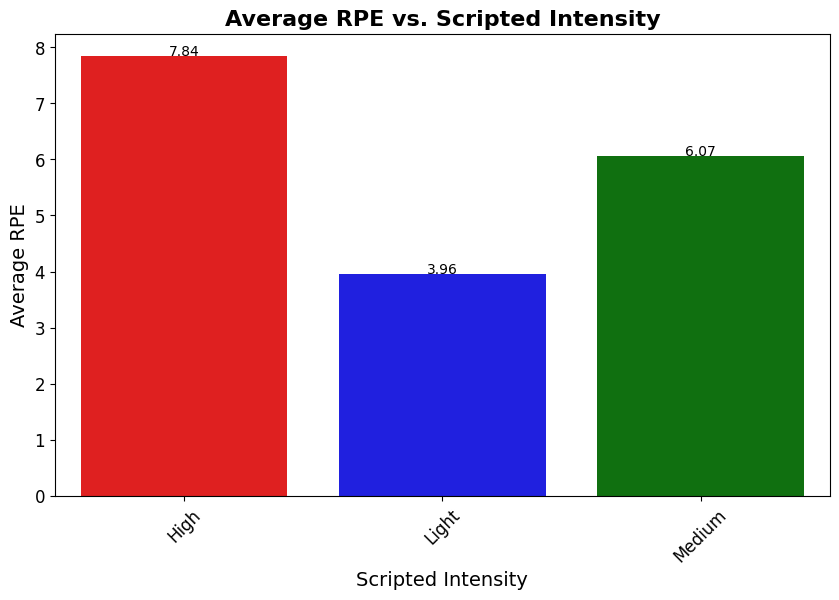

In [18]:
# Filter the OFF days from 'scriptedIntensity' column
df_filtered = df[df['scriptedIntensity'] != 'OFF'].copy()

# make 'scriptedIntensity' column categorical  
intensity_order = ['Light', 'Medium', 'High']
df_filtered.loc[:, 'scriptedIntensity'] = pd.Categorical(
    df_filtered['scriptedIntensity'], 
    categories=intensity_order, 
    ordered=True
)

# Calculate the average RPE for each scripted intensity
avgRPE_data = df_filtered.groupby('scriptedIntensity').agg(avgRPE=('RPE', 'mean')).reset_index()

# Visualize the graph
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=avgRPE_data, 
    x='scriptedIntensity', 
    y='avgRPE', 
    hue='scriptedIntensity', 
    dodge=False, 
    palette={'Light': 'blue', 'Medium': 'green', 'High': 'red'}
)

for index, row in avgRPE_data.iterrows():
    bar_plot.text(index, row.avgRPE, round(row.avgRPE, 2), color='black', ha="center")

plt.title('Average RPE vs. Scripted Intensity', fontsize=16, fontweight='bold')
plt.xlabel('Scripted Intensity', fontsize=14)
plt.ylabel('Average RPE', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Does sleep have an affect on the following day's performance?

In [19]:
# Calculate the correlation between 'totalSleep' and 'Overall'
correlation = df['totalSleep'].corr(df['Overall'])
print(f"Correlation between totalSleep and Overall: {correlation:.2f}")

Correlation between totalSleep and Overall: 0.27


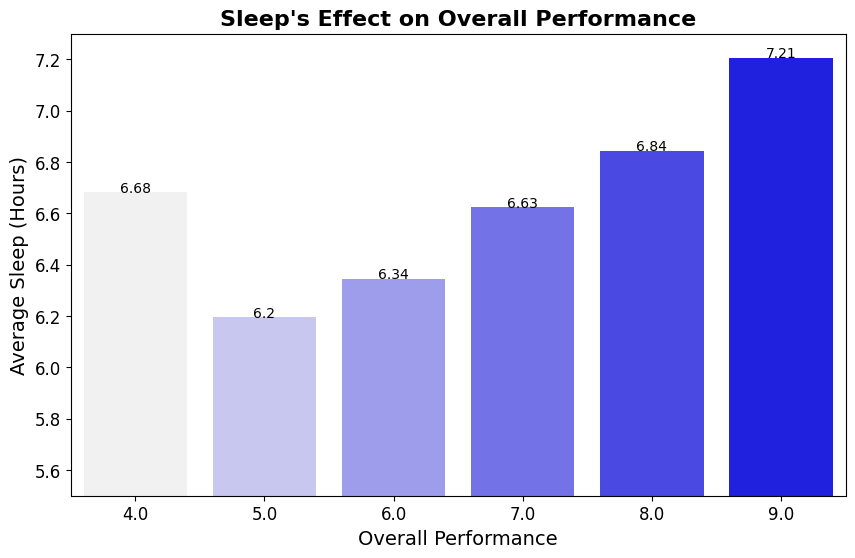

In [20]:
# Calculate the average sleep duration and convert minutes to hours
avgSleep_data = df.groupby('Overall').agg(avgSleep=('totalSleep', 'mean')).reset_index()
avgSleep_data['avgSleep'] = avgSleep_data['avgSleep'] / 60  # Convert minutes to hours

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=avgSleep_data,
    x='Overall',
    y='avgSleep',
    hue='Overall',   # Set hue as Overall for categorical distinction
    dodge=False,     # Disable shadowing
    palette=sns.light_palette("blue", n_colors=len(avgSleep_data)),
    legend=False     # Hide the color legend
)

# Add values on top of the bars
for index, row in avgSleep_data.iterrows():
    bar_plot.text(index, row.avgSleep, round(row.avgSleep, 2), color='black', ha="center", size=10)

# Limit the Y axis
plt.ylim(5.5, 7.3)  # Limit the Y axis between 5 and 7

# Set the title and labels
plt.title("Sleep's Effect on Overall Performance", fontsize=16, fontweight='bold')
plt.xlabel("Overall Performance", fontsize=14)
plt.ylabel("Average Sleep (Hours)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


#### Considering all the data, how accurately can the machine know overall performance value when new input values ​​are given?

In [21]:
# Drop the 'scriptedIntensity' column
df = df.drop(['scriptedIntensity'], axis=1)

In [22]:
# Check for missing values
df.isna().sum()

Weight                    9
RPE                      49
Strain                   15
maxHR                    23
averageHR                23
kCal_Out                 34
kCal_In                  93
Protein                  95
Carbs                    94
Fats                     96
saturatedFat             95
Cholesterol              95
Sodium                   96
Potassium                98
Sugar                    98
Vitamin_A                98
Vitamin_C                99
Calcium                 101
Iron                    102
Creatine                  0
Fish Oil                  0
Vitamin_D                 0
135ozWater                0
totalSleep               59
In_bed_duration          60
Light_sleep_duration     60
Deep_SWS_duration        60
REM_Duration             60
awakeDuration            62
HRV                      48
restingHR                46
respitoryRate            42
iceTub                    0
redLight                  0
Speed                    95
Strength            

In [23]:
# Fill missing values with the mean of each column
for column in df.columns:
    df.loc[:, column] = df[column].fillna(df[column].mean())

In [24]:
# Check for missing values after filling them with the mean
df.isna().sum()

Weight                  0
RPE                     0
Strain                  0
maxHR                   0
averageHR               0
kCal_Out                0
kCal_In                 0
Protein                 0
Carbs                   0
Fats                    0
saturatedFat            0
Cholesterol             0
Sodium                  0
Potassium               0
Sugar                   0
Vitamin_A               0
Vitamin_C               0
Calcium                 0
Iron                    0
Creatine                0
Fish Oil                0
Vitamin_D               0
135ozWater              0
totalSleep              0
In_bed_duration         0
Light_sleep_duration    0
Deep_SWS_duration       0
REM_Duration            0
awakeDuration           0
HRV                     0
restingHR               0
respitoryRate           0
iceTub                  0
redLight                0
Speed                   0
Strength                0
Mental                  0
Soreness                0
Overall     

In [25]:
# Split the target and features
X = df.drop(columns=['Overall'])  # Feature columns (all columns except the target)
y = df['Overall']  # Target column

In [26]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Make predictions using the model on the test data
y_pred_rf = rf_model.predict(X_test)

In [29]:
# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest R-squared (R2): {r2_rf:.2f}")

Random Forest Mean Squared Error (MSE): 0.51
Random Forest R-squared (R2): 0.42


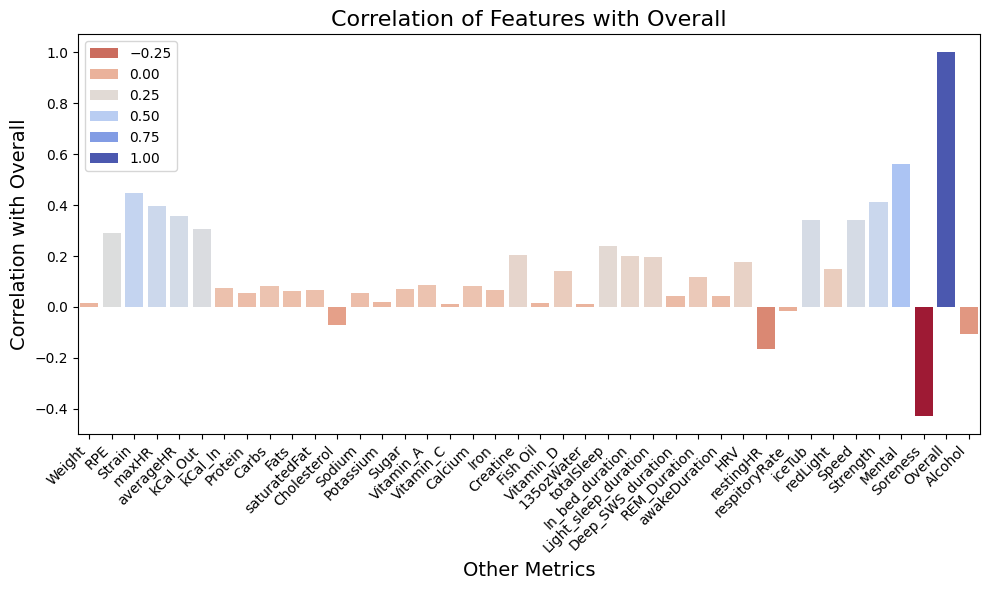

In [30]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation values with the 'Overall' column
overall_correlation = correlation_matrix['Overall']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=overall_correlation.index, y=overall_correlation.values, palette='coolwarm_r', hue=overall_correlation.values)  

# Set the title and labels
plt.title('Correlation of Features with Overall', fontsize=16)
plt.xlabel('Other Metrics', fontsize=14)
plt.ylabel('Correlation with Overall', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()